In [9]:
import numpy as np

# Parameters
n_points = 10
x = np.linspace(2, 50, n_points)  # avoid ln(1)=0
noise_level = 0.05  # 5% noise

# Function with noise
y = 1 / (2.1 * (np.log(x))**3)
noise = np.random.normal(0, noise_level * y)
y_noisy = y + noise

# Combine into list of tuples (x, y_noisy)
data = list(zip(x, y_noisy))

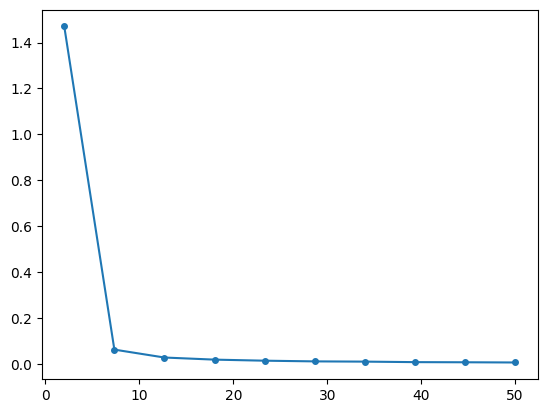

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y_noisy, '-o', label='Noisy Data', markersize=4)


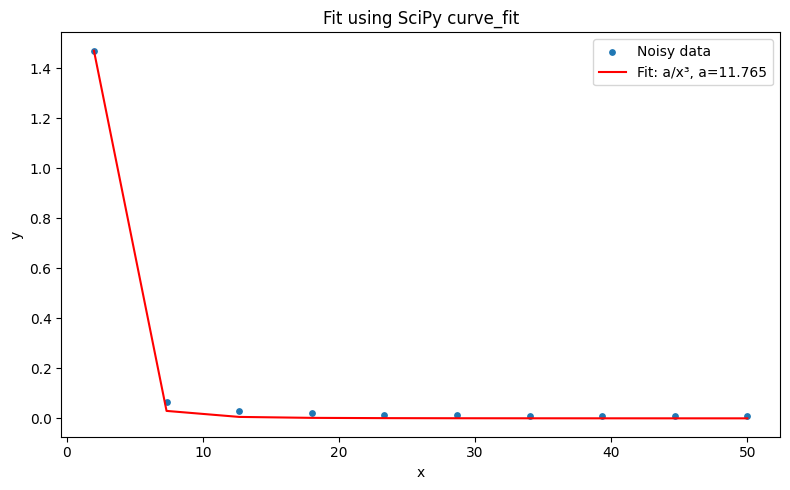

In [11]:
from scipy.optimize import curve_fit
# Define model function y = a / x^3
def model(x, a):
    return a / x**3

# Fit model using SciPy
popt, pcov = curve_fit(model, x, y_noisy)
a_hat = popt[0]
perr = np.sqrt(np.diag(pcov))
y_fit = model(x, a_hat)

# Plot data and fit
plt.figure(figsize=(8, 5))
plt.scatter(x, y_noisy, s=15, label="Noisy data")
plt.plot(x, y_fit, color="red", label=f"Fit: a/x³, a={a_hat:.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fit using SciPy curve_fit")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Compute fitted values and R^2
ss_res = np.sum((y_noisy - y_fit)**2)
ss_tot = np.sum((y_noisy - np.mean(y_noisy))**2)
r2 = 1 - ss_res / ss_tot

# Display results
print(f"a_hat = {a_hat:.6f} ± {perr[0]:.6f}")
print(f"R² = {r2:.6f}")


a_hat = 11.765338 ± 0.137831
R² = 0.998590
